In [1]:
import os

exp_root_path = os.environ["DATA"] + "/07_BBO/04_BBO_chem/01_QED/06_"
output_fig_path = os.environ["FIGURES"] + "/07_BBO/04_BBO_chem/01_QED/06_"
os.makedirs(output_fig_path, exist_ok=True)


dataset_paths = {
    "methane": None,
    "QM9": os.environ["DATA"] + "/00_datasets/DFT/QM9/filtered_QM9_charges_radicals_stereo.smi",
    "QM9_sw": os.environ["DATA"] + "/00_datasets/DFT/QM9/filtered_QM9_charges_radicals_stereo_sillywalks.smi",

#     "ChEMBL": os.environ["DATA"] + "/00_datasets/ChEMBL25/filtered_ChEMBL_charges_radicals_stereo_CNOF.smi",
    "ChEMBL_CNOF_filtered": os.environ["DATA"] + "/00_datasets/ChEMBL25/filtered_ChEMBL_charges_radicals_stereo_CNOF_QED_below_QM9.smi"
}



datasets_values = dataset_paths.keys()
xi_values = [0.01]
merit_values = ["EI", "POI", "surrogate"]
kernel_values = ["RBF"]
optim_depths = [10]
sw_thresholds = [1]
desc_values = ["shingles", "random"]

ERT_TARGETS = [0.9, 0.94, 0.948]



In [2]:
def compute_path(path_root, dataset_value, xi_value, merit_value, kernel_value, optim_depth, sw_thresh, desc):
    if desc == "random":
        desc_path_key = "_random_desc"
    else:
        desc_path_key = ""
    
    return path_root + dataset_value + "_xi_" + str(xi_value) + "_" + merit_value + "_" + kernel_value + desc_path_key + "_depth_" + str(optim_depth) + "_sw_" + str(sw_thresh) + "/"
    

parameters_all = []
models_paths = []
parameters = []

for dataset_value in datasets_values:
    for xi_value in xi_values:
        for merit_value in merit_values:
            for kernel_value in kernel_values:
                for optim_depth in optim_depths:
                    for sw_thresh in sw_thresholds:
                        for desc in desc_values:
                            for run_id in range(1, 11):
                                parameters_all.append({
                                    "dataset_value": dataset_value,
                                    "xi_value": xi_value,
                                    "merit_value": merit_value,
                                    "kernel_value": kernel_value,
                                    "optim_depth": optim_depth,
                                    "sw_thresh": sw_thresh,
                                    "run_id": run_id,
                                    "desc": desc
                                })

for param in parameters_all:
    if param["run_id"] == 1:
        models_paths.append(compute_path(exp_root_path, param["dataset_value"], param["xi_value"],
                                         param["merit_value"], param["kernel_value"], param["optim_depth"],
                                         param["sw_thresh"], param["desc"]))
        parameters.append(param)

In [3]:
len(parameters_all)

240

In [5]:
models_paths

['/home/jleguy/Documents/these/prod/data/07_BBO/04_BBO_chem/01_QED/06_methane_xi_0.01_EI_RBF_depth_10_sw_1/',
 '/home/jleguy/Documents/these/prod/data/07_BBO/04_BBO_chem/01_QED/06_methane_xi_0.01_EI_RBF_random_desc_depth_10_sw_1/',
 '/home/jleguy/Documents/these/prod/data/07_BBO/04_BBO_chem/01_QED/06_methane_xi_0.01_POI_RBF_depth_10_sw_1/',
 '/home/jleguy/Documents/these/prod/data/07_BBO/04_BBO_chem/01_QED/06_methane_xi_0.01_POI_RBF_random_desc_depth_10_sw_1/',
 '/home/jleguy/Documents/these/prod/data/07_BBO/04_BBO_chem/01_QED/06_methane_xi_0.01_surrogate_RBF_depth_10_sw_1/',
 '/home/jleguy/Documents/these/prod/data/07_BBO/04_BBO_chem/01_QED/06_methane_xi_0.01_surrogate_RBF_random_desc_depth_10_sw_1/',
 '/home/jleguy/Documents/these/prod/data/07_BBO/04_BBO_chem/01_QED/06_QM9_xi_0.01_EI_RBF_depth_10_sw_1/',
 '/home/jleguy/Documents/these/prod/data/07_BBO/04_BBO_chem/01_QED/06_QM9_xi_0.01_EI_RBF_random_desc_depth_10_sw_1/',
 '/home/jleguy/Documents/these/prod/data/07_BBO/04_BBO_chem/01_Q

In [4]:
from os.path import exists

BBO_exp_dict_methane = {"sw_off": {}, "sw_on": {}}
BBO_exp_dict_qm9 = {"sw_off": {}, "sw_on": {}}
BBO_exp_dict_chembl = {"sw_off": {}, "sw_on": {}}

def get_model_name(merit_value, kernel_value, desc_value):
    
#     output_name = "(" + (merit_value if merit_value != "surrogate" else "id") + ", " + kernel_value + ")"
    output_name = "BBOMol " + (merit_value if merit_value != "surrogate" else "id") + ", " + kernel_value + ", " + ("aléatoire" if desc_value == "random" else desc_value)
    
    return output_name


for i in range(len(parameters)):
    if exists(models_paths[i]):
        if parameters[i]["dataset_value"] == "methane":
            d = BBO_exp_dict_methane
        elif parameters[i]["dataset_value"] == "QM9" or parameters[i]["dataset_value"] == "QM9_sw":
            d = BBO_exp_dict_qm9
        elif parameters[i]["dataset_value"] == "ChEMBL_CNOF_filtered":
            d = BBO_exp_dict_chembl
          
        sw_key = "sw_off" if parameters[i]["sw_thresh"] == 1 else "sw_on"
        d[sw_key][get_model_name(parameters[i]["merit_value"], parameters[i]["kernel_value"], parameters[i]["desc"])] = models_paths[i]


In [5]:
import os

EvoMol_exp_dict_methane = {
    "sw_off": {"EvoMol": os.environ["DATA"] + "/07_BBO/04_BBO_chem/01_QED/01.21_test_EvoMol_QED_CONF/"},
    "sw_on": {"EvoMol": os.environ["DATA"] + "/07_BBO/04_BBO_chem/01_QED/01.31_test_EvoMol_QED_CONF_sw_0/"}
}

EvoMol_exp_dict_QM9 = {
    "sw_off": {"EvoMol": os.environ["DATA"] + "/07_BBO/04_BBO_chem/01_QED/01.22_test_EvoMol_QED_DOE_random_QM9_CONF/"},
    "sw_on": {"EvoMol": os.environ["DATA"] + "/07_BBO/04_BBO_chem/01_QED/01.32_test_EvoMol_QED_DOE_random_QM9_sw_CONF_sw_0/"}
}

EvoMol_exp_dict_ChEMBL = {
    "sw_off": {"EvoMol": os.environ["DATA"] + "/07_BBO/04_BBO_chem/01_QED/01.24_test_EvoMol_QED_DOE_random_ChEMBL_filtered_CONF/"},
    "sw_on": {"EvoMol": os.environ["DATA"] + "/07_BBO/04_BBO_chem/01_QED/01.34_test_EvoMol_QED_DOE_random_ChEMBL_filtered_CONF_sw_0/"}
}




In [6]:
BBO_exp_dict_methane["sw_off"]

{'BBOMol EI, RBF, shingles': '/home/jleguy/Documents/these/prod/data/07_BBO/04_BBO_chem/01_QED/06_methane_xi_0.01_EI_RBF_depth_10_sw_1/',
 'BBOMol EI, RBF, aléatoire': '/home/jleguy/Documents/these/prod/data/07_BBO/04_BBO_chem/01_QED/06_methane_xi_0.01_EI_RBF_random_desc_depth_10_sw_1/',
 'BBOMol POI, RBF, shingles': '/home/jleguy/Documents/these/prod/data/07_BBO/04_BBO_chem/01_QED/06_methane_xi_0.01_POI_RBF_depth_10_sw_1/',
 'BBOMol POI, RBF, aléatoire': '/home/jleguy/Documents/these/prod/data/07_BBO/04_BBO_chem/01_QED/06_methane_xi_0.01_POI_RBF_random_desc_depth_10_sw_1/',
 'BBOMol id, RBF, shingles': '/home/jleguy/Documents/these/prod/data/07_BBO/04_BBO_chem/01_QED/06_methane_xi_0.01_surrogate_RBF_depth_10_sw_1/',
 'BBOMol id, RBF, aléatoire': '/home/jleguy/Documents/these/prod/data/07_BBO/04_BBO_chem/01_QED/06_methane_xi_0.01_surrogate_RBF_random_desc_depth_10_sw_1/'}

In [7]:
from bbomol.postprocessing.postprocessing import load_complete_input_results
from bbomol.postprocessing.plot import plot_best_so_far
from bbomol.postprocessing import plot
plot.save_show = False
plot.init_figure = False
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)
linestyles = ['solid', 'dashed', 'dotted', 'dashdot', (0, (5, 10)), (0, (3, 10, 1, 10)), (0, (1, 10))]
from os.path import join
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import FormatStrFormatter

def get_linestyle_color(name):
    if "EI" in name:
            linestyle = linestyles[0]
    elif "POI" in name:
        linestyle = linestyles[1]
    elif "id" in name:
        linestyle = linestyles[2]
    else:
        linestyle = linestyles[3]

    if "shingles" in name:
        c = sns.color_palette()[0]
    elif "aléatoire" in name:
        c = sns.color_palette()[1]
    else:
        c = sns.color_palette()[3]
    
    return linestyle, c

def plot(BBO_dict_methane, EvoMol_dict_methane, BBO_dict_QM9, EvoMol_dict_QM9, BBO_dict_ChEMBL, 
         EvoMol_dict_ChEMBL):
    
    ylim = (0.6, 0.95)
    ylim2 = (0.6, 0.95)
    ylim3 = (0.6, 0.95)
    
    res_dict_no_filter_methane = load_complete_input_results(BBO_dict_methane["sw_off"], 
                                                             EvoMol_dict_methane["sw_off"], 
                                                             include_dataset_init_step=True,
                                                             sub_experiment_names=[str(i) for i in range(1, 11)])
    
    res_dict_no_filter_QM9 = load_complete_input_results(BBO_dict_QM9["sw_off"], 
                                                             EvoMol_dict_QM9["sw_off"], 
                                                             include_dataset_init_step=True,
                                                             sub_experiment_names=[str(i) for i in range(1, 11)])
    
    res_dict_no_filter_ChEMBL = load_complete_input_results(BBO_dict_ChEMBL["sw_off"], 
                                                            EvoMol_dict_ChEMBL["sw_off"], 
                                                            include_dataset_init_step=True,
                                                            sub_experiment_names=[str(i) for i in range(1, 11)])
    
    
    plot_data_methane = plot_best_so_far(res_dict_no_filter_methane, plot_legend=False, plot_last_common_data_all_runs=True)
    plot_data_QM9 = plot_best_so_far(res_dict_no_filter_QM9, plot_legend=False, plot_last_common_data_all_runs=True)
    plot_data_ChEMBL = plot_best_so_far(res_dict_no_filter_ChEMBL, plot_legend=False, plot_last_common_data_all_runs=True)


    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(11, 6), 
                                        gridspec_kw={"width_ratios":[0.308, 0.308, 0.385]})
    
#     plt.subplot(1, 2, 1)
#     plt.ylim(ylim)
    
    for data in plot_data_methane:
        name, x, y = data
        
        linestyle, c = get_linestyle_color(name)
        ax1.plot(x, y, label=name, linestyle=linestyle, color=c)
        ax1.set_ylim(ylim)
        ax1.set_xlim((0, 2000))
#         ax1.legend()
        ax1.set_title("Initialisation méthane")
        ax1.set_ylabel("QED")
#         line = ax1.plot([-45], [0.7], color=sns.color_palette()[4], marker='>', alpha=1)[0]
#         line.set_clip_on(False)
#         line = ax1.plot([-45], [0.8], color=sns.color_palette()[5], marker=">", alpha=1)[0]
#         line.set_clip_on(False)
#         line = ax1.plot([-45], [0.95], color=sns.color_palette()[6], marker=">", alpha=1)[0]
#         line.set_clip_on(False)

#     plt.subplot(1, 2, 2)
#     plt.ylim(ylim)
    
    for data in plot_data_QM9:
        name, x, y = data
        
        linestyle, c = get_linestyle_color(name)
        ax2.plot(x, y, label=name, linestyle=linestyle, color=c)
        ax2.set_ylim(ylim2)
        ax2.set_xlim((0, 2000))
        ax2.set_title("Initialisation QM9")
#         line = ax2.plot([-45], [0.7], color=sns.color_palette()[4], marker='>', alpha=1)[0]
#         line.set_clip_on(False)
#         line = ax2.plot([-45], [0.8], color=sns.color_palette()[5], marker='>', alpha=1)[0]
#         line.set_clip_on(False)
#         line = ax2.plot([-45], [0.95], color=sns.color_palette()[6], marker=">", alpha=1)[0]
#         line.set_clip_on(False)

        #         plt.legend()
    
    for data in plot_data_ChEMBL:
        name, x, y = data
        
        linestyle, c = get_linestyle_color(name)
        ax3.plot(x, y, label=name, linestyle=linestyle, color=c)
        ax3.set_ylim(ylim3)
        ax3.set_xlim((0, 2500))
        ax3.set_title("Initialisation ChEMBL")
# #         ax3.plot([40], [0.90], color=sns.color_palette()[3], marker="<")
#         line = ax3.plot([-45], [0.8], color=sns.color_palette()[5], marker=">", alpha=1)[0]
#         line.set_clip_on(False)
#         line = ax3.plot([-45], [0.95], color=sns.color_palette()[6], marker=">", alpha=1)[0]
#         line.set_clip_on(False)
#         ax3.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

        plt.legend(loc="lower right")

    
    plt.tight_layout()
    
    plt.savefig(join(output_fig_path, "desc_effect" + ".jpg"), dpi=200)


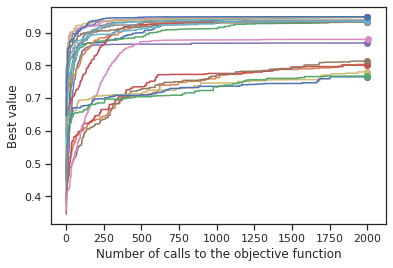

In [10]:
plot(BBO_exp_dict_methane, EvoMol_exp_dict_methane, BBO_exp_dict_qm9, EvoMol_exp_dict_QM9,
     BBO_exp_dict_chembl, EvoMol_exp_dict_ChEMBL)

In [8]:
from bbomol.postprocessing.plot import display_ert

def ert_for_dataset(BBO_dict, EvoMol_dict):
    
    res_dict_no_filter = load_complete_input_results(BBO_dict["sw_off"], EvoMol_dict["sw_off"], 
                                                     include_dataset_init_step=True,
                                                     sub_experiment_names=[str(i) for i in range(1, 11)])
    res_dict_filter = load_complete_input_results(BBO_dict["sw_on"], EvoMol_dict["sw_on"], 
                                                  include_dataset_init_step=True,
                                                  sub_experiment_names=[str(i) for i in range(1, 11)])
    
    ert_data_no_filter = display_ert(res_dict_no_filter, ert_targets=ERT_TARGETS)
    ert_data_filter = display_ert(res_dict_filter, ert_targets=ERT_TARGETS)

    

In [9]:
ert_for_dataset(BBO_exp_dict_methane, EvoMol_exp_dict_methane)

Experiment                      0.9  \
0    BBOMol EI, RBF, shingles             482.2 (10.0)   
1   BBOMol EI, RBF, aléatoire                inf (0.0)   
2   BBOMol POI, RBF, shingles  957.5555555555555 (9.0)   
3  BBOMol POI, RBF, aléatoire                inf (0.0)   
4    BBOMol id, RBF, shingles                inf (0.0)   
5   BBOMol id, RBF, aléatoire                inf (0.0)   
6                      EvoMol            18583.0 (1.0)   

                       0.94          0.948  
0             1078.1 (10.0)      inf (0.0)  
1                 inf (0.0)      inf (0.0)  
2  1894.2857142857142 (7.0)      inf (0.0)  
3                 inf (0.0)      inf (0.0)  
4                 inf (0.0)      inf (0.0)  
5                 inf (0.0)      inf (0.0)  
6             19417.0 (1.0)  19625.0 (1.0)

Experiment        0.9       0.94      0.948
0     EvoMol  inf (0.0)  inf (0.0)  inf (0.0)

In [10]:
ert_for_dataset(BBO_exp_dict_qm9, EvoMol_exp_dict_QM9)

Experiment                      0.9          0.94  \
0    BBOMol EI, RBF, shingles             161.9 (10.0)  825.0 (10.0)   
1   BBOMol EI, RBF, aléatoire                inf (0.0)     inf (0.0)   
2   BBOMol POI, RBF, shingles             160.9 (10.0)  904.5 (10.0)   
3  BBOMol POI, RBF, aléatoire                inf (0.0)     inf (0.0)   
4    BBOMol id, RBF, shingles             360.8 (10.0)     inf (0.0)   
5   BBOMol id, RBF, aléatoire                inf (0.0)     inf (0.0)   
6                      EvoMol  527.4444444444445 (9.0)  3099.0 (5.0)   

          0.948  
0  3494.8 (5.0)  
1     inf (0.0)  
2  9512.5 (2.0)  
3     inf (0.0)  
4     inf (0.0)  
5     inf (0.0)  
6  4360.5 (4.0)

Experiment           0.9                     0.94      0.948
0     EvoMol  314.9 (10.0)  5306.666666666667 (3.0)  inf (0.0)

In [11]:
ert_for_dataset(BBO_exp_dict_chembl, EvoMol_exp_dict_ChEMBL)

Experiment           0.9                      0.94  \
0    BBOMol EI, RBF, shingles   79.4 (10.0)              369.2 (10.0)   
1   BBOMol EI, RBF, aléatoire  226.8 (10.0)             3475.25 (4.0)   
2   BBOMol POI, RBF, shingles   48.6 (10.0)              481.3 (10.0)   
3  BBOMol POI, RBF, aléatoire  202.0 (10.0)  1898.8333333333333 (6.0)   
4    BBOMol id, RBF, shingles   43.7 (10.0)   658.4444444444445 (9.0)   
5   BBOMol id, RBF, aléatoire  339.6 (10.0)             4009.75 (4.0)   
6                      EvoMol   78.4 (10.0)              241.0 (10.0)   

                      0.948  
0              3413.6 (5.0)  
1                 inf (0.0)  
2  2608.3333333333335 (6.0)  
3                 inf (0.0)  
4             3875.75 (4.0)  
5                 inf (0.0)  
6              591.8 (10.0)

Experiment          0.9                     0.94                    0.948
0     EvoMol  92.7 (10.0)  371.3333333333333 (9.0)  1471.857142857143 (7.0)